In [64]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import chi2
import scipy.stats as sts

In [65]:
def fx(x):
    return 1 / (x + 3)

def F(y):
    return -1 / 10 * (1 / y - 13)

def g(y):
    return 0.1 / (y ** 2)

In [83]:
def generate_Y_v(n):
    a = 0
    b = 10
    # print('M', (b+a)/2)
    # print('D', round(((b-a)**2)/12, 4))
    E = []
    for i in range(n):
        E.append(np.random.uniform(0, 1))

    X = []
    Y_v = []
    for i in range(n):
        X.append(E[i] * (b - a) + a)
        Y_v.append(fx(X[i]))
    Y_v = sorted(Y_v)
    return Y_v

### Доверительный интервал для оценки мат ожидания при неизвестной дисперсии

In [84]:
def math_interval_unknown(Y_v, a):
    n = len(Y_v)
    M = sum(Y_v) / n # точная оценка мат ожидания
    D = 0
    for y in Y_v:         #
        D += (M - y) ** 2 # точная оценка дисперсии
    D /= n - 1            #
    
    # Квантиль нормального распределение уровня (1 - a/2)
    u = sts.norm.ppf(1 - a / 2.0)
    print('m_interval: ({l}, {r})'.format(l=(M - math.sqrt(D / (n - 1)) * u),
                                              r=(M + math.sqrt(D / (n - 1)) * u)))


In [123]:
    Y_v = generate_Y_v(20)

    alpha = [0.1, 0.01, 0.05, 0.001]
    for _alpha in alpha:
        print('alpha = {}, unknown D:'.format(_alpha))
        math_interval_unknown(Y_v, _alpha)
        print()


alpha = 0.1, unknown D:
m_interval: (0.12722565624744328, 0.17649576562191568)

alpha = 0.01, unknown D:
m_interval: (0.11328238717494178, 0.1904390346944172)

alpha = 0.05, unknown D:
m_interval: (0.12250623272883113, 0.18121518914052784)

alpha = 0.001, unknown D:
m_interval: (0.1025783282035456, 0.20114309366581337)



### Доверительный интервал для оценки мат ожидания при известной дисперсии

In [86]:
def math_interval_known(Y_v, a):
    n = len(Y_v)
    M = sum(Y_v) / n
    D = 0.004
    # Квантиль нормального распределение уровня (1 - a/2)
    u = sts.norm.ppf(1 - a / 2.0)
    print('m_interval: ({l}, {r})'.format(l=(M - math.sqrt(D / (n - 1)) * u),
                                              r=(M + math.sqrt(D / (n - 1)) * u)))


In [87]:
    Y_v = generate_Y_v(20)

    alpha = [0.1, 0.01, 0.05, 0.001]
    for _alpha in alpha:
        print('alpha = {}, known D:'.format(_alpha))
        math_interval_known(Y_v, _alpha)
        print()


alpha = 0.1, known D:
m_interval: (0.09512407723622843, 0.14285616688665267)

alpha = 0.01, known D:
m_interval: (0.08161606238019777, 0.15636418174268335)

alpha = 0.05, known D:
m_interval: (0.09055197562434464, 0.14742826849853646)

alpha = 0.001, known D:
m_interval: (0.07124614218045025, 0.16673410194243085)



### График зависимости величины доверительного интервала от уровня значимости

In [88]:
def plot_m_unknown(Y_v):
    n = len(Y_v)
    M = sum(Y_v) / n
    D = 0
    for y in Y_v:
        D += (M - y) ** 2 
    D /= n - 1
    a = np.arange(0,0.3,0.001)
    u = sts.norm.ppf(1 - x/2.0)
    h = [2 * math.sqrt(D / (n-1))* u for x in a]
    plt.plot(a,h, label='used unknown D')
    plt.ylabel('$h(a)$')
    plt.xlabel('$a$')
    plt.legend()


In [89]:
def plot_m_known(Y_v):
    n = len(Y_v)
    D = 0.004
    a = np.arange(0,0.3,0.001)
    u = sts.norm.ppf(1 - x/2.0)
    h = [2*math.sqrt(D/(n-1))* u for x in a]
    plt.plot(a,h, label='used known D')
    plt.ylabel('$h(a)$')
    plt.xlabel('$a$')
    plt.legend()

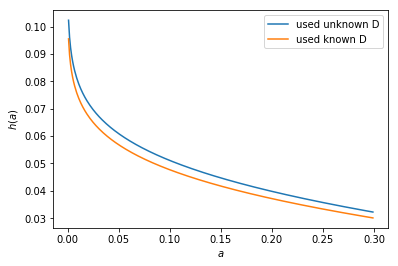

In [94]:
    n = 20
    Y_v = generate_Y_v(n)
    plot_m_unknown(Y_v)
    plot_m_known(Y_v)
    plt.show()

### График зависимости величины доверительного интервала от объема выборки

In [95]:
def plot_h_n(a):
    D = 0.004
    n = np.arange(2, 100, 1)
    u = sts.norm.ppf(1 - a/2.0)
    h = [2*math.sqrt(D / (x-1))* u for x in n]
    plt.plot(n, h)
    plt.ylabel('$h(n)$')
    plt.xlabel('$n$')

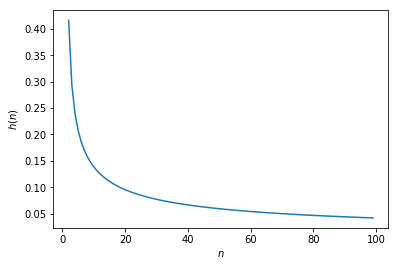

In [96]:
    n = 20
    plot_h_n(0.001)
    plt.show()

### Доверительные интервалы и графики для значений 30, 50, 70, 100, 150

alpha = 0.1, unknown D:
m_interval: (0.1208387002697719, 0.15926820914376094)

alpha = 0.01, unknown D:
m_interval: (0.10996328332109884, 0.170143626092434)

alpha = 0.05, unknown D:
m_interval: (0.11715766261243343, 0.1629492468010994)

alpha = 0.001, unknown D:
m_interval: (0.10161437290763628, 0.17849253650589655)

alpha = 0.1, known D:
m_interval: (0.12073562854900642, 0.1593712808645264)

alpha = 0.01, known D:
m_interval: (0.1098018737255186, 0.17030503568801425)

alpha = 0.05, known D:
m_interval: (0.11703484508191594, 0.1630720643316169)

alpha = 0.001, known D:
m_interval: (0.10140817811505265, 0.17869873129848018)



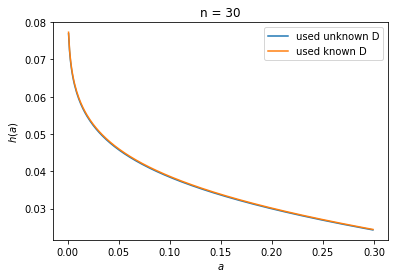

In [97]:
    Y_v = generate_Y_v(30)

    alpha = [0.1, 0.01, 0.05, 0.001]
    for _alpha in alpha:
        print('alpha = {}, unknown D:'.format(_alpha))
        math_interval_unknown(Y_v, _alpha)
        print()
    for _alpha in alpha:
        print('alpha = {}, known D:'.format(_alpha))
        math_interval_known(Y_v, _alpha)
        print()
    plt.title('n = 30')
    plot_m_unknown(Y_v)
    plot_m_known(Y_v)
    plt.show()

alpha = 0.1, unknown D:
m_interval: (0.1294335229113622, 0.15942002486306936)

alpha = 0.01, unknown D:
m_interval: (0.12094744746797437, 0.1679061003064572)

alpha = 0.05, unknown D:
m_interval: (0.12656121342497167, 0.1622923343494599)

alpha = 0.001, unknown D:
m_interval: (0.11443280219293742, 0.17442074558149415)

alpha = 0.1 with known D:
m_interval: (0.12956539137648557, 0.159288156397946)

alpha = 0.01 with known D:
m_interval: (0.12115395256430217, 0.1676995952101294)

alpha = 0.05 with known D:
m_interval: (0.12671834439279975, 0.16213520338163182)

alpha = 0.001 with known D:
m_interval: (0.11469660482097638, 0.17415694295345518)



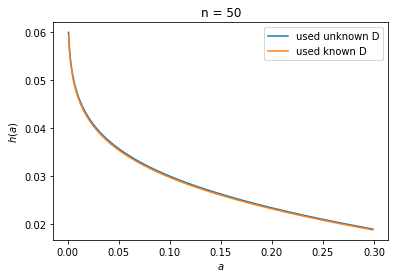

In [98]:
    Y_v = generate_Y_v(50)

    alpha = [0.1, 0.01, 0.05, 0.001]
    for _alpha in alpha:
        print('alpha = {}, unknown D:'.format(_alpha))
        math_interval_unknown(Y_v, _alpha)
        print()
    for _alpha in alpha:
        print('alpha = {} with known D:'.format(_alpha))
        math_interval_known(Y_v, _alpha)
        print()
    plt.title('n = 50')
    plot_m_unknown(Y_v)
    plot_m_known(Y_v)
    plt.show()

M for alpha = 0.1, unknown D:
m_interval: (0.13194672375230682, 0.1569616935094913)

M for alpha = 0.01, unknown D:
m_interval: (0.12486757457660753, 0.1640408426851906)

M for alpha = 0.05, unknown D:
m_interval: (0.12955062116418076, 0.15935779609761735)

M for alpha = 0.001, unknown D:
m_interval: (0.11943300755721045, 0.16947540970458766)

M for alpha = 0.1 with known D:
m_interval: (0.13193050714978174, 0.15697791011201637)

M for alpha = 0.01 with known D:
m_interval: (0.12484217949019762, 0.1640662377716005)

M for alpha = 0.05 with known D:
m_interval: (0.12953129789043774, 0.15937711937136037)

M for alpha = 0.001 with known D:
m_interval: (0.11940056627293541, 0.1695078509888627)



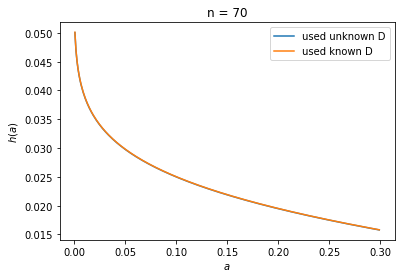

In [124]:
    Y_v = generate_Y_v(70)

    alpha = [0.1, 0.01, 0.05, 0.001]
    for _alpha in alpha:
        print('M for alpha = {}, unknown D:'.format(_alpha))
        math_interval_unknown(Y_v, _alpha)
        print()
    for _alpha in alpha:
        print('M for alpha = {} with known D:'.format(_alpha))
        math_interval_known(Y_v, _alpha)
        print()
    plt.title('n = 70')
    plot_m_unknown(Y_v)
    plot_m_known(Y_v)
    plt.show()

alpha = 0.1, unknown D:
m_interval: (0.1294459846368621, 0.15061174721652051)

alpha = 0.01, unknown D:
m_interval: (0.12345614766431084, 0.15660158418907177)

alpha = 0.05, unknown D:
m_interval: (0.12741858508415166, 0.15263914676923096)

alpha = 0.001, unknown D:
m_interval: (0.11885783088150666, 0.16119990097187598)

alpha = 0.1 with known D:
m_interval: (0.1295734899394703, 0.15048424191391233)

alpha = 0.01 with known D:
m_interval: (0.12365582007858195, 0.15640191177480067)

alpha = 0.05 with known D:
m_interval: (0.1275705170231735, 0.1524872148302091)

alpha = 0.001 with known D:
m_interval: (0.11911290501075714, 0.16094482684262548)



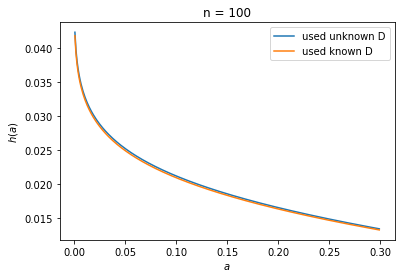

In [101]:
    Y_v = generate_Y_v(100)

    alpha = [0.1, 0.01, 0.05, 0.001]
    for _alpha in alpha:
        print('alpha = {}, unknown D:'.format(_alpha))
        math_interval_unknown(Y_v, _alpha)
        print()
    for _alpha in alpha:
        print('alpha = {} with known D:'.format(_alpha))
        math_interval_known(Y_v, _alpha)
        print()
    plt.title('n = 100')
    plot_m_unknown(Y_v)
    plot_m_known(Y_v)
    plt.show()

alpha = 0.1, unknown D:
m_interval: (0.14646233303330583, 0.16404156104175896)

alpha = 0.01, unknown D:
m_interval: (0.1414874728326562, 0.1690164212424086)

alpha = 0.05, unknown D:
m_interval: (0.14477847596143328, 0.1657254181136315)

alpha = 0.001, unknown D:
m_interval: (0.13766833998186542, 0.17283555409319937)

alpha = 0.1 with known D:
m_interval: (0.14672950378244887, 0.16377439029261592)

alpha = 0.01 with known D:
m_interval: (0.1419058603617455, 0.1685980337133193)

alpha = 0.05 with known D:
m_interval: (0.14509682954467185, 0.16540706453039294)

alpha = 0.001 with known D:
m_interval: (0.13820281458648864, 0.17230107948857615)



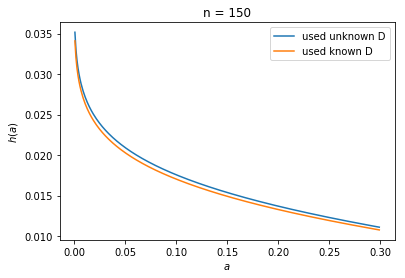

In [102]:
    Y_v = generate_Y_v(150)

    alpha = [0.1, 0.01, 0.05, 0.001]
    for _alpha in alpha:
        print('alpha = {}, unknown D:'.format(_alpha))
        math_interval_unknown(Y_v, _alpha)
        print()
    for _alpha in alpha:
        print('alpha = {} with known D:'.format(_alpha))
        math_interval_known(Y_v, _alpha)
        print()
    plt.title('n = 150')
    plot_m_unknown(Y_v)
    plot_m_known(Y_v)
    plt.show()

### Доверительный интервал для оценки дисперсии при неизвестной дисперсии

In [103]:
def d_interval_unknown(Y_v, a):
    n = len(Y_v)
    M = 0.146
    D = sum([(M - y)**2 for y in Y_v]) / (n-1) # оценка дисперсии
    #Chi2
    print("d_interval: ({}, {})".format(D*(n-1)/sts.chi2.ppf(1-a/2, n-1), D*(n-1)/sts.chi2.ppf(a/2, n-1)))


In [104]:
Y_v = generate_Y_v(20)
alpha = [0.1, 0.01, 0.05, 0.001]
for _alpha in alpha:
    print('alpha = {}, unknown M:'.format(_alpha))
    d_interval_unknown(Y_v, _alpha)
    print()


alpha = 0.1, unknown M:
d_interval: (0.0025746342175709345, 0.007671093838870055)

alpha = 0.01, unknown M:
d_interval: (0.0020115090072929317, 0.011339696139901196)

alpha = 0.05, unknown M:
d_interval: (0.002362345806084886, 0.008713682474948322)

alpha = 0.001, unknown M:
d_interval: (0.0016881290049082578, 0.015798693658348996)



In [105]:
def d_interval_known(Y_v, a):
    n = len(Y_v)
    M = sum([x / n for x in Y_v])
    D = sum([(M - y)**2 for y in Y_v]) / (n-1)
    #Chi2
    print("d_interval: ({}, {})".format(D*(n-1)/sts.chi2.ppf(1-a/2, n-1), D*(n-1)/sts.chi2.ppf(a/2, n-1)))


In [106]:
Y_v = generate_Y_v(20)
alpha = [0.1, 0.01, 0.05, 0.001]
for _alpha in alpha:
    print('alpha = {}, known M:'.format(_alpha))
    d_interval_known(Y_v, _alpha)
    print()

alpha = 0.1, known M:
d_interval: (0.001439627237057371, 0.004289353242139165)

alpha = 0.01, known M:
d_interval: (0.00112475128883249, 0.0063406814496383196)

alpha = 0.05, known M:
d_interval: (0.0013209244802924525, 0.00487232498519354)

alpha = 0.001, known M:
d_interval: (0.0009439307838553291, 0.008833965440707556)



### График зависимости величины доверительного интервала от уровня значимости

In [107]:
def plot_d_unknown(Y_v):
    n = len(Y_v)
    M = sum(Y_v) / n
    a = np.arange(0.001,0.3,0.001)
    D = sum([(M - y)**2 for y in Y_v]) / (n-1)
    h = [D*(n-1)/sts.chi2.ppf(x/2, n-1) - D*(n-1)/sts.chi2.ppf(1-x/2, n-1) for x in a]
    plt.plot(a,h, label='used unknown M')
    plt.ylabel('$h(a)$')
    plt.xlabel('$a$')
    plt.legend()

In [110]:
def plot_d_known(Y_v):
    n = len(Y_v)
    M = 0.14
    a = np.arange(0.001,0.3,0.001)
    D = sum([(M - y)**2 for y in Y_v]) / (n-1)
    h = [D*(n-1)/sts.chi2.ppf(x/2, n-1) - D*(n-1)/sts.chi2.ppf(1-x/2, n-1) for x in a]
    plt.plot(a,h, label='used known M')
    plt.ylabel('$h(a)$')
    plt.xlabel('$a$')
    plt.legend()

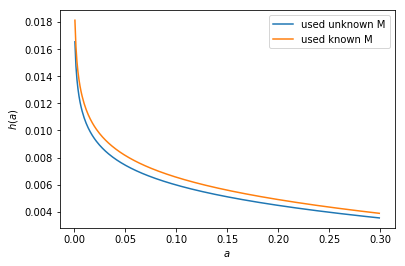

In [111]:
n = 20
Y_v = generate_Y_v(n)
plot_d_unknown(Y_v)
plot_d_known(Y_v)
plt.show()

### График зависимости величины доверительного интервала от объема выборки

In [112]:
def plot_d(a):
    M = 0
    n = np.arange(5,150,1)
    h = []
    for _n in n:
        Y_v = generate_Y_v(_n)
        D = sum([(x - M)**2 for x in Y_v]) / (_n-1)
        h.append(D*(_n-1)/sts.chi2.ppf(a/2, _n-1) - D*(_n-1)/sts.chi2.ppf(1-a/2, _n-1))
    plt.plot(n, h, label='chi2')
    plt.ylabel('$h(n)$')
    plt.xlabel('$n$')
    plt.legend()

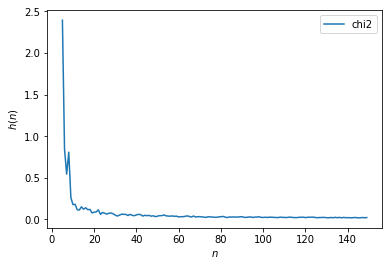

In [117]:
plot_d(0.001)
plt.show()

### Доверительные интервалы и графики для значений 30, 50, 70, 100, 150

alpha = 0.1, unknown M:
d_interval: (0.0027297103998635427, 0.006560074283685622)

alpha = 0.01, unknown M:
d_interval: (0.0022196775831938016, 0.008853508072652713)

alpha = 0.05, unknown M:
d_interval: (0.0025407346889780684, 0.007239214718258543)

alpha = 0.001, unknown M:
d_interval: (0.0019127170902154991, 0.011359211110623001)

alpha = 0.1, known M:
d_interval: (0.0027295933543626466, 0.0065597929984692535)

alpha = 0.01, known M:
d_interval: (0.0022195824070628226, 0.00885312844876034)

alpha = 0.05, known M:
d_interval: (0.0025406257464454358, 0.007238904312615207)

alpha = 0.001, known M:
d_interval: (0.0019126350760465575, 0.011358724046297683)



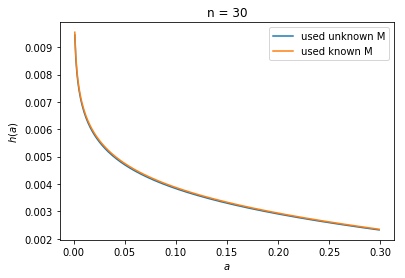

In [118]:
    Y_v = generate_Y_v(30)

    alpha = [0.1, 0.01, 0.05, 0.001]
    for _alpha in alpha:
        print('alpha = {}, unknown M:'.format(_alpha))
        d_interval_unknown(Y_v, _alpha)
        print()
    for _alpha in alpha:
        print('alpha = {}, known M:'.format(_alpha))
        d_interval_known(Y_v, _alpha)
        print()
    plt.title('n = 30')
    plot_d_unknown(Y_v)
    plot_d_known(Y_v)
    plt.show()

alpha = 0.1, unknown M:
d_interval: (0.0036452572566754923, 0.007127004509907403)

alpha = 0.01, unknown M:
d_interval: (0.0030911319490782895, 0.00887439331297036)

alpha = 0.05, unknown M:
d_interval: (0.003443650380045785, 0.007663510738552748)

alpha = 0.001, unknown M:
d_interval: (0.002740791221091033, 0.010611191484073065)

alpha = 0.1, known M:
d_interval: (0.0036433696934340264, 0.0071233140511037)

alpha = 0.01, known M:
d_interval: (0.0030895313193748807, 0.008869798032739535)

alpha = 0.05, known M:
d_interval: (0.003441867211556941, 0.00765954246960707)

alpha = 0.001, known M:
d_interval: (0.0027393720025291634, 0.010605696866386806)



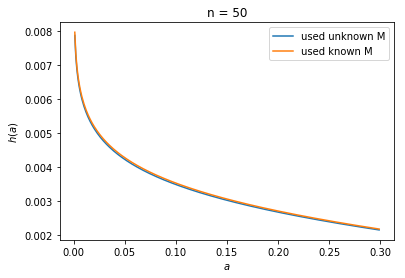

In [119]:
    Y_v = generate_Y_v(50)

    alpha = [0.1, 0.01, 0.05, 0.001]
    for _alpha in alpha:
        print('alpha = {}, unknown M:'.format(_alpha))
        d_interval_unknown(Y_v, _alpha)
        print()
    for _alpha in alpha:
        print('alpha = {}, known M:'.format(_alpha))
        d_interval_known(Y_v, _alpha)
        print()
    plt.title('n = 50')
    plot_d_unknown(Y_v)
    plot_d_known(Y_v)
    plt.show()

alpha = 0.1, unknown M:
d_interval: (0.00343544106621443, 0.005034820470179231)

alpha = 0.01, unknown M:
d_interval: (0.003109234898724331, 0.005662287889912709)

alpha = 0.05, unknown M:
d_interval: (0.0033200824105958766, 0.005236434441960248)

alpha = 0.001, unknown M:
d_interval: (0.002886575709432217, 0.006215495576046985)

alpha = 0.1, known M:
d_interval: (0.0034166404101570107, 0.005007267114977886)

alpha = 0.01, known M:
d_interval: (0.0030922194253670617, 0.005631300681846979)

alpha = 0.05, known M:
d_interval: (0.0033019130616590655, 0.0052077777422780145)

alpha = 0.001, known M:
d_interval: (0.002870778751763391, 0.0061814809059363915)



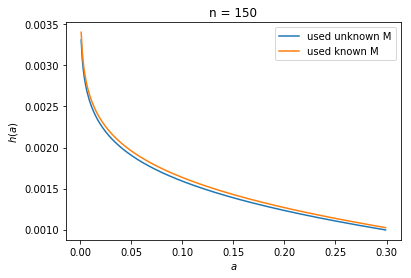

In [120]:
    Y_v = generate_Y_v(150)

    alpha = [0.1, 0.01, 0.05, 0.001]
    for _alpha in alpha:
        print('alpha = {}, unknown M:'.format(_alpha))
        d_interval_unknown(Y_v, _alpha)
        print()
    for _alpha in alpha:
        print('alpha = {}, known M:'.format(_alpha))
        d_interval_known(Y_v, _alpha)
        print()
    plt.title('n = 150')
    plot_d_unknown(Y_v)
    plot_d_known(Y_v)
    plt.show()